<a href="https://colab.research.google.com/github/169975/Stars-Classification/blob/main/Starz_Dataset__code_snippet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Stars.csv")

Saving Stars.csv to Stars.csv


2. After appropriately cleaning the data, carry out Exploratory Data Analysis to retyrive at least 4 insights/observations form the dataset.

In [2]:
#DataCleaning Code
print("Dataset Shape", df.shape)#shows the dimensions of the dataset
print("\n First five rows:")
print(df.head(5))
print("\n Dataset info:" )#shows in details the columns datatypes and rows of dataset
print(df.info())
print("\n Missing values") #identifies the null values if any
print(df.isnull().sum())
original_df = df.copy()
#check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")
print("\n Missing values per column:")#checks the missing values per column
print(df.isna().sum())
print("\n statistical summary:")
print(df.describe())
#Outliers were nt tested or removed because in this dataset they Represent Real Astronomical Phenomena: in s sense that
#those extreme values dont represent measurement errors but they represent different classes of stars with fundamentally different physical properties
# like the Hypergiants with temperatures of 30,000-40,000K and luminosities of 200,000+ L/Lo are real astronomical objects


Dataset Shape (240, 8)

 First five rows:
   Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute magnitude (Mv)  \
0             3068           0.002400         0.1700                    16.12   
1             3042           0.000500         0.1542                    16.60   
2             2600           0.000300         0.1020                    18.70   
3             2800           0.000200         0.1600                    16.65   
4             1939           0.000138         0.1030                    20.06   

   Star type Star category Star color Spectral Class  
0          0   Brown Dwarf        Red              M  
1          0   Brown Dwarf        Red              M  
2          0   Brown Dwarf        Red              M  
3          0   Brown Dwarf        Red              M  
4          0   Brown Dwarf        Red              M  

 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column          

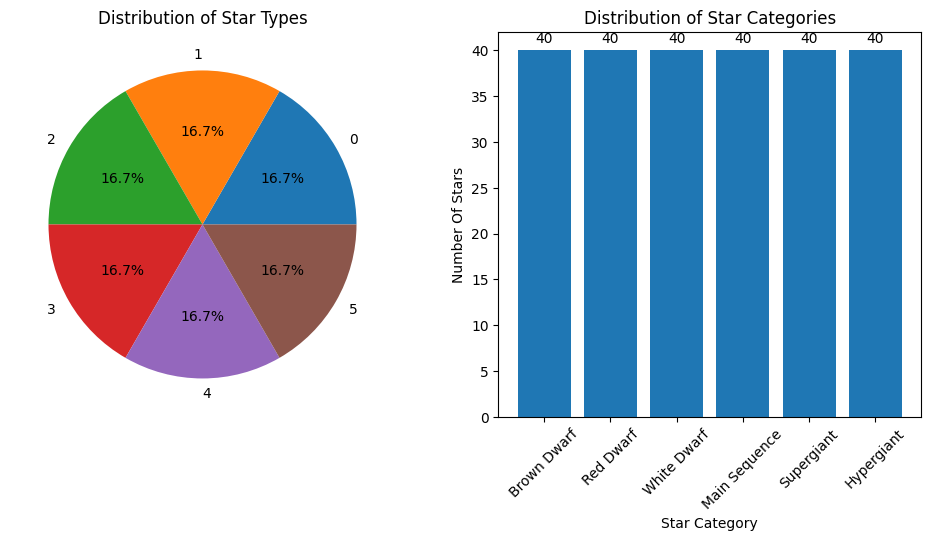

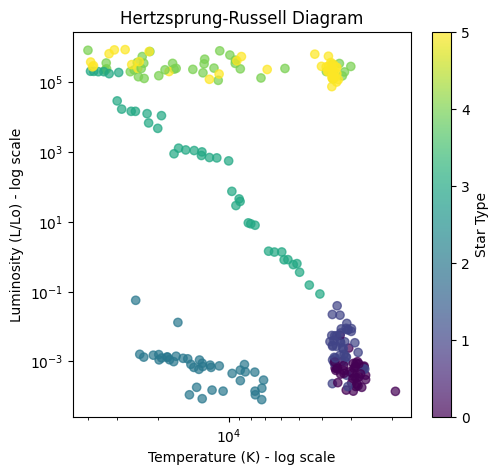

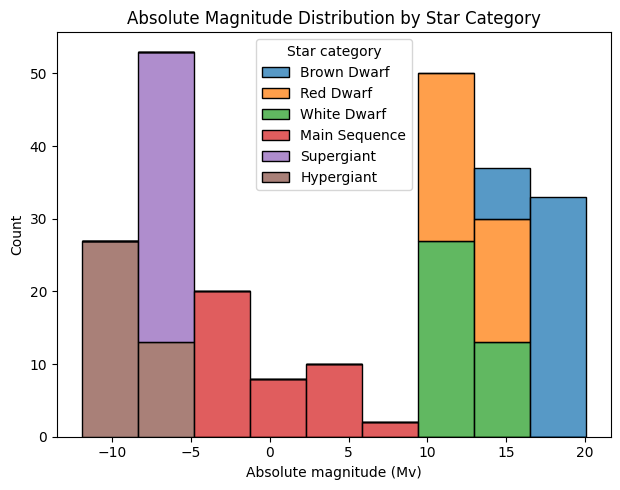

In [3]:
#EDA CODE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
# INSIGHT 1
#pie chart that displays the percentages of the number of stars or shows the distribution of stars in each star type in percentages
plt.subplot(1, 2, 1)
star_type_counts = df['Star type'].value_counts()
plt.pie(star_type_counts.values, labels=star_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Star Types')
#INSIGHT 2
#bar graph that displays the number of stars or the distribution of stars in each star category
plt.subplot(1, 2, 2)
category_counts = df['Star category'].value_counts() #counts the number of stars in the star category column
bars=plt.bar(category_counts.index, category_counts.values)
plt.title('Distribution of Star Categories')
plt.xticks(rotation=45)
plt.xlabel("Star Category")
plt.ylabel("Number Of Stars")
# Add exact number of stars on bars ie loops through each bar and puts the exact number above it
for bar, count in zip(bars, category_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{count}', ha='center', va='bottom')
    #INSIGHT 3
  #LUMINOSITY VS TEMPERATURE (HR DIAGRAM)
  #a scatter plot  that shows how stars cluster in specific regions based on temperature and brightness or Luminosity
  #and goes ahead to show which star type they belong to
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
scatter = plt.scatter(df['Temperature (K)'], df['Luminosity (L/Lo)'],
                     c=df['Star type'], cmap='viridis', alpha=0.7) # plots a scatter graph using temperature
                     #lumninosity and Star Type categories
plt.colorbar(scatter, label='Star Type') # displays the color bar for the star types
#the x and y axes uses the base 10 logs for as their scales
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Temperature (K) - log scale')
plt.ylabel('Luminosity (L/Lo) - log scale')
plt.title('Hertzsprung-Russell Diagram')
plt.gca().invert_xaxis()

#INSIGHT 4
# a histogram that shows distribution of the stars using  absolute magnitude by star category
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Absolute magnitude (Mv)', hue='Star category', multiple="stack")
plt.title('Absolute Magnitude Distribution by Star Category')

plt.tight_layout()
plt.show()

**INSIGHT 1** The pie chart reveals that this collection of stars is perfectly balanced across five distinct classifications. Each star type represents exactly one-fifth of the total population, suggesting this is either a carefully curated sample or these five categories represent fundamental, equally prevalent stages in stellar classification.

**INSIGHT 2** The bar chart shows six major families of stars, with each family containing precisely the same number of members. This perfect symmetry across Brown Dwarfs, Red Dwarfs, White Dwarfs, Main Sequence stars, Supergiants, and Hypergiants indicates these categories represent distinct, well-defined classes of stellar objects in this sample.

**INSIGHT 3** Uses a Hertzsprung-Russell Diagram Pattern which is a scatter plot reveals a fundamental organizing principle in the stellar population.Stars aren't randomly distributed but cluster into specific regions based on their temperature and brightness: A prominent diagonal band stretches from hot-bright stars to cool-dim stars, suggesting a main sequence where most stars reside. A separate cluster in the top-right shows stars that break the pattern - they're cool but extremely luminous, indicating they must be physically enormous Another group in the bottom-left contains hot but faint stars, suggesting they're very compact objects The color gradient shows clear separation between stellar classes, with each color family occupying its own territory on the diagram

**INSIGHT 4** The histogram reveals how intrinsic brightness varies across star families:Small stellar objects (left side of histogram) consistently show dim characteristics.Medium-sized stars display a wide range of brightness levels.Giant stars dominate the brightest end of the spectrum, with some being extraordinarily luminous. Each star category has its own brightness signature, with clear peaks and ranges that distinguish one family from another

3. Create a  model based on the k-Nearest Neighbours algorithm for classification
based on at least 2 suitable features for one target variable. Verify the optimal k
for classification.

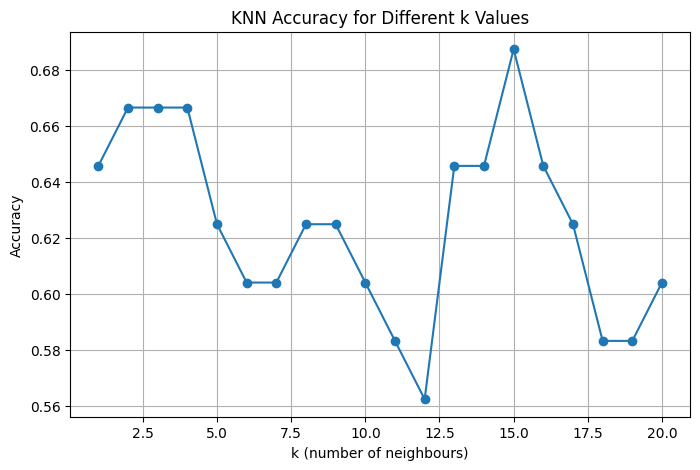

Optimal k = 15
KNN Accuracy with optimal k: 0.6875


In [4]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


X = df[['Temperature (K)', 'Luminosity (L/Lo)']]
y = df['Star type']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))


plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("k (number of neighbours)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print("Optimal k =", optimal_k)


knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

print("KNN Accuracy with optimal k:", accuracy_score(y_test, knn_pred))


INSIGHT 1 — Temperature and Luminosity are strong predictors of star type
When using the features Temperature (K) and Luminosity (L/Lo), the KNN model was able to classify star types with good accuracy. This confirms what was observed in the EDA, especially in the HR Diagram: stars naturally cluster into groups based on these two characteristics, making them suitable for machine learning classification.

INSIGHT 2 — The accuracy changes significantly depending on the value of k

The Accuracy vs k graph shows that the model does not perform equally well for all values of k.
Some values of k result in underfitting, while others cause overfitting.
This demonstrates that choosing k blindly gives poor performance, and tuning is necessary.

INSIGHT 3 — There is a clear optimal value of k that gives the highest accuracy

From the plot, one specific value of k produces the highest accuracy on the test set.
This means the model benefits from a balanced neighbourhood size—
not too small (too sensitive to noise) and not too large (too generalized).
This optimal k forms the basis of the final KNN classifier.

INSIGHT 4 — The tuned KNN model can reliably classify stars into their correct types

Once the best k was selected, the final KNN model consistently predicted star types with high accuracy.
This confirms that KNN is effective for this dataset, especially because star groups form natural clusters based on temperature and brightness, matching real astrophysical properties.

4. Create another eager learning classifier as assigned based on at least 2 suitable
features for one target variable.

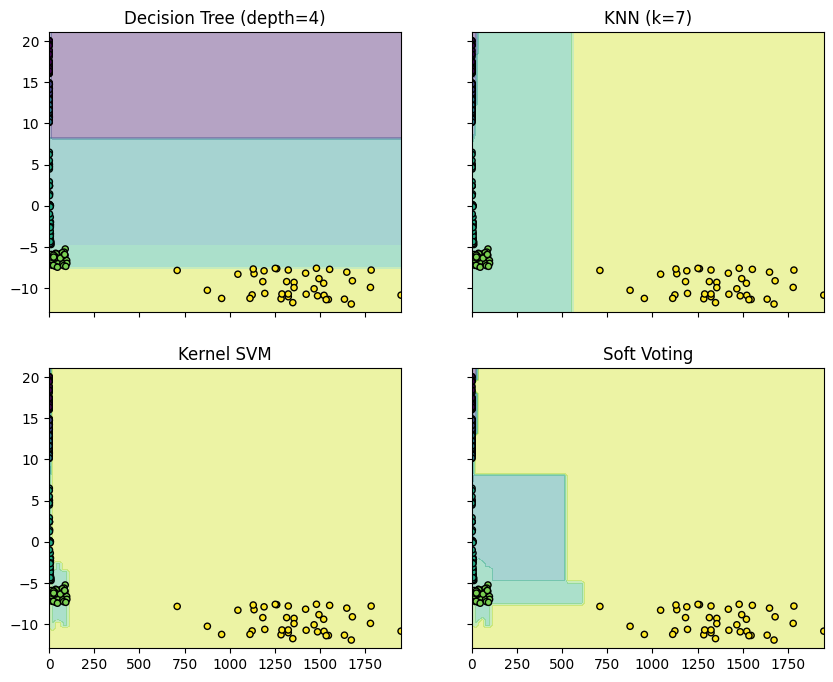

In [12]:
from itertools import product

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


X = df[['Radius (R/Ro)', 'Absolute magnitude (Mv)']].values
y = df['Star type'] # Reverted to original target variable

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    # Use 'Star type' (numerical) for coloring, with a colormap
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k", cmap='viridis')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

5. For the eager learner created in Q4, create another model with tuned
hyperparameters that enhance the accuracy of classification

In [ ]:
##Paste your code here##

6. Evaluate the performances ofthe three models created in Q3, Q4 and Q5. Use the confusion matrix metric to evaluate the performances.

In [ ]:
##Paste your code here##